<a href="https://colab.research.google.com/github/noelia232636/proyecto_integrador_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Ciencias Sociales", "Educación Física", "Inglés", "Educación Artística", "Música",
    "Tecnología", "Formación Ética y Ciudadana", "Prácticas del Lenguaje"
]

# Función para generar un nombre y apellido aleatorios
def generar_nombre():
    nombres = ["Juan", "Pedro", "Maria", "Ana", "Jose", "Sofia", "Luis", "Laura", "Diego", "Carolina"]
    apellidos = ["Gomez", "Perez", "Rodriguez", "Lopez", "Gonzalez", "Martinez", "Sanchez", "Romero", "Diaz", "Torres"]
    return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear un DataFrame vacío
df = pd.DataFrame(columns=["Apellido y Nombre", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Generar 100 filas de datos aleatorios
for _ in range(100):
    nombre = generar_nombre()
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)

    nueva_fila = pd.DataFrame({
        "Apellido y Nombre": [nombre],
        "Nro DNI": [dni],
        "Materia Escolar": [materia],
        "Nota 1er Trimestre": [nota1],
        "Nota 2do Trimestre": [nota2],
        "Nota 3er Trimestre": [nota3],
        "Faltas a clases": [faltas]
    })
    df = pd.concat([df, nueva_fila], ignore_index=True)


df

,Apellido y Nombre,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Diego Rodriguez,59135936,Educación Física,9,10,8,4
1,Laura Diaz,33063690,Prácticas del Lenguaje,1,5,10,6
2,Luis Perez,19196474,Geografía,6,1,8,6
3,Laura Martinez,20959720,Historia,9,6,2,18
4,Maria Torres,24838294,Matemática,8,4,2,18
...,...,...,...,...,...,...,...
95,Sofia Rodriguez,80861121,Música,7,1,3,5
96,Laura Diaz,73527046,Educación Artística,6,10,7,5
97,Diego Diaz,69763244,Matemática,9,8,5,18
98,Carolina Diaz,42620430,Ciencias Sociales,7,9,5,15


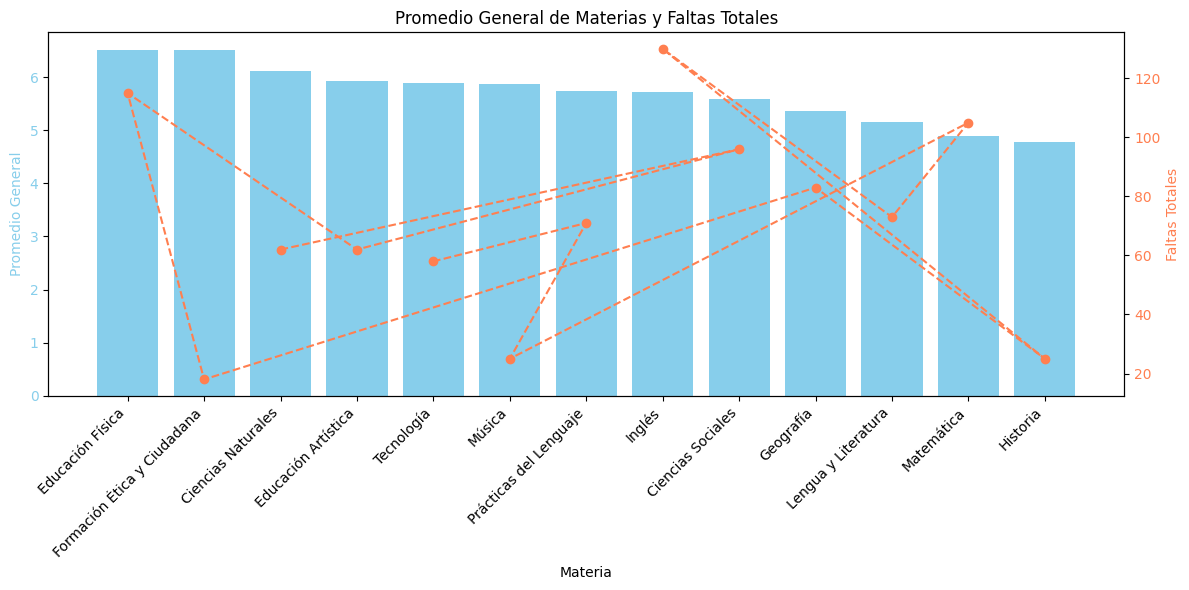

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
ax1.bar(average_grades.index, average_grades.values, color='skyblue')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, marker='o', color='coral', linestyle='dashed')
ax2.set_ylabel('Faltas Totales', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')


# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
df.to_csv('datos_alumnos.csv', index=False)